In [110]:
# PCA example on the MNIST dataset

import torch
import torchvision
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Download MNIST dataset
mnist_train = torchvision.datasets.MNIST('./mnist', download=True,train=True)
mnist_val = torchvision.datasets.MNIST('./mnist', download=True,train=False)

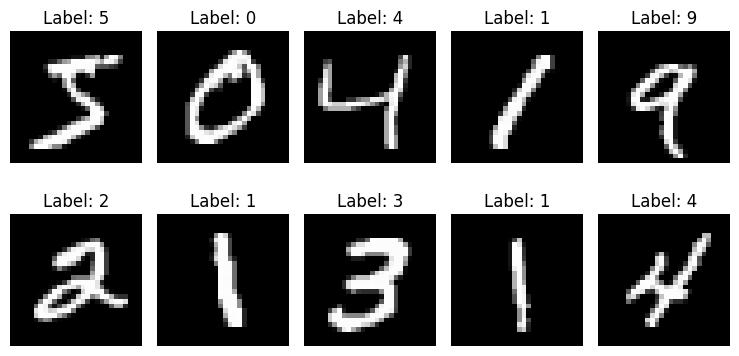

In [111]:
# simply plot images
fig, axes = plt.subplots(2, 5, figsize=(1.5*5,2*2))
for i in range(10):
    ax = axes[i//5, i%5]
    ax.imshow(mnist_train[i][0], cmap='gray')
    ax.set_title('Label: {}'.format(mnist_train[i][1]))
    ax.axis('off')

plt.tight_layout()
plt.show()

In [112]:
# Lets transform each image in a vector x_i, and create matrix X

X = torch.empty(len(mnist_train),28*28)
for i in range(len(mnist_train)):
    X[i] = torch.squeeze(torchvision.transforms.functional.to_tensor(mnist_train[i][0])).flatten()

In [113]:
# Calculate the average number
X_average=X.mean(dim=0)

# Standardize the data matrix
for i in range(len(mnist_train)):
    X[i]-=X_average
    X[i]=torch.div(X[i], math.sqrt(28*28))
X=X.t()

In [114]:
# Calculate the SVD of this data
U, S, V = torch.linalg.svd(X)

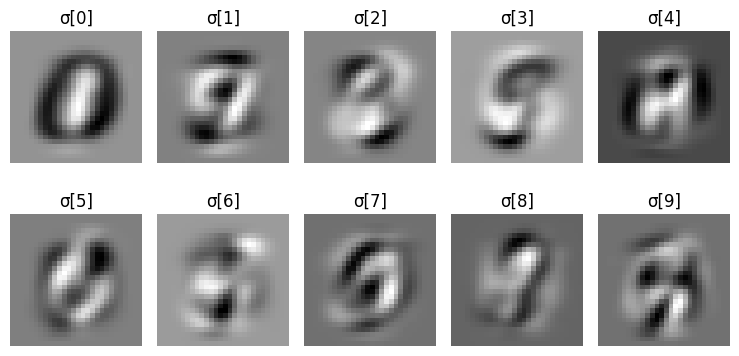

In [115]:
# Lets vizualize what these subspaces looks like ???
fig, axes = plt.subplots(2, 5, figsize=(1.5*5,2*2))
for i in range(10):
    ax = axes[i//5, i%5]
    ax.imshow(torch.reshape(U.T[i], (28,28)), cmap='gray')
    ax.set_title('σ[{}]'.format(i))
    ax.axis('off')

plt.tight_layout()
plt.show()

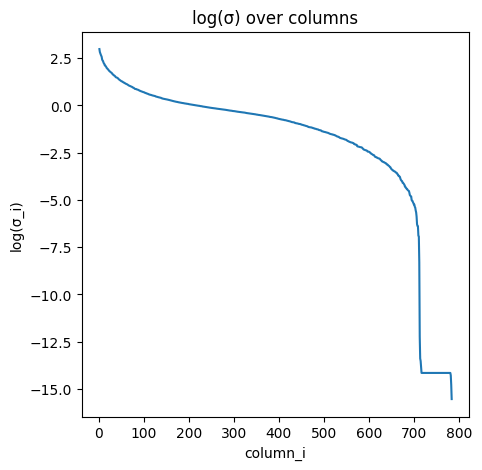

In [116]:
# Plot σ over columns
plt.figure(figsize=(5,5))
plt.plot(torch.arange(1,len(S)+1),torch.log(S))
plt.title('log(σ) over columns')
plt.xlabel('column_i')
plt.ylabel('log(σ_i)')
plt.show()